# Práctica 5 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas

In [1]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

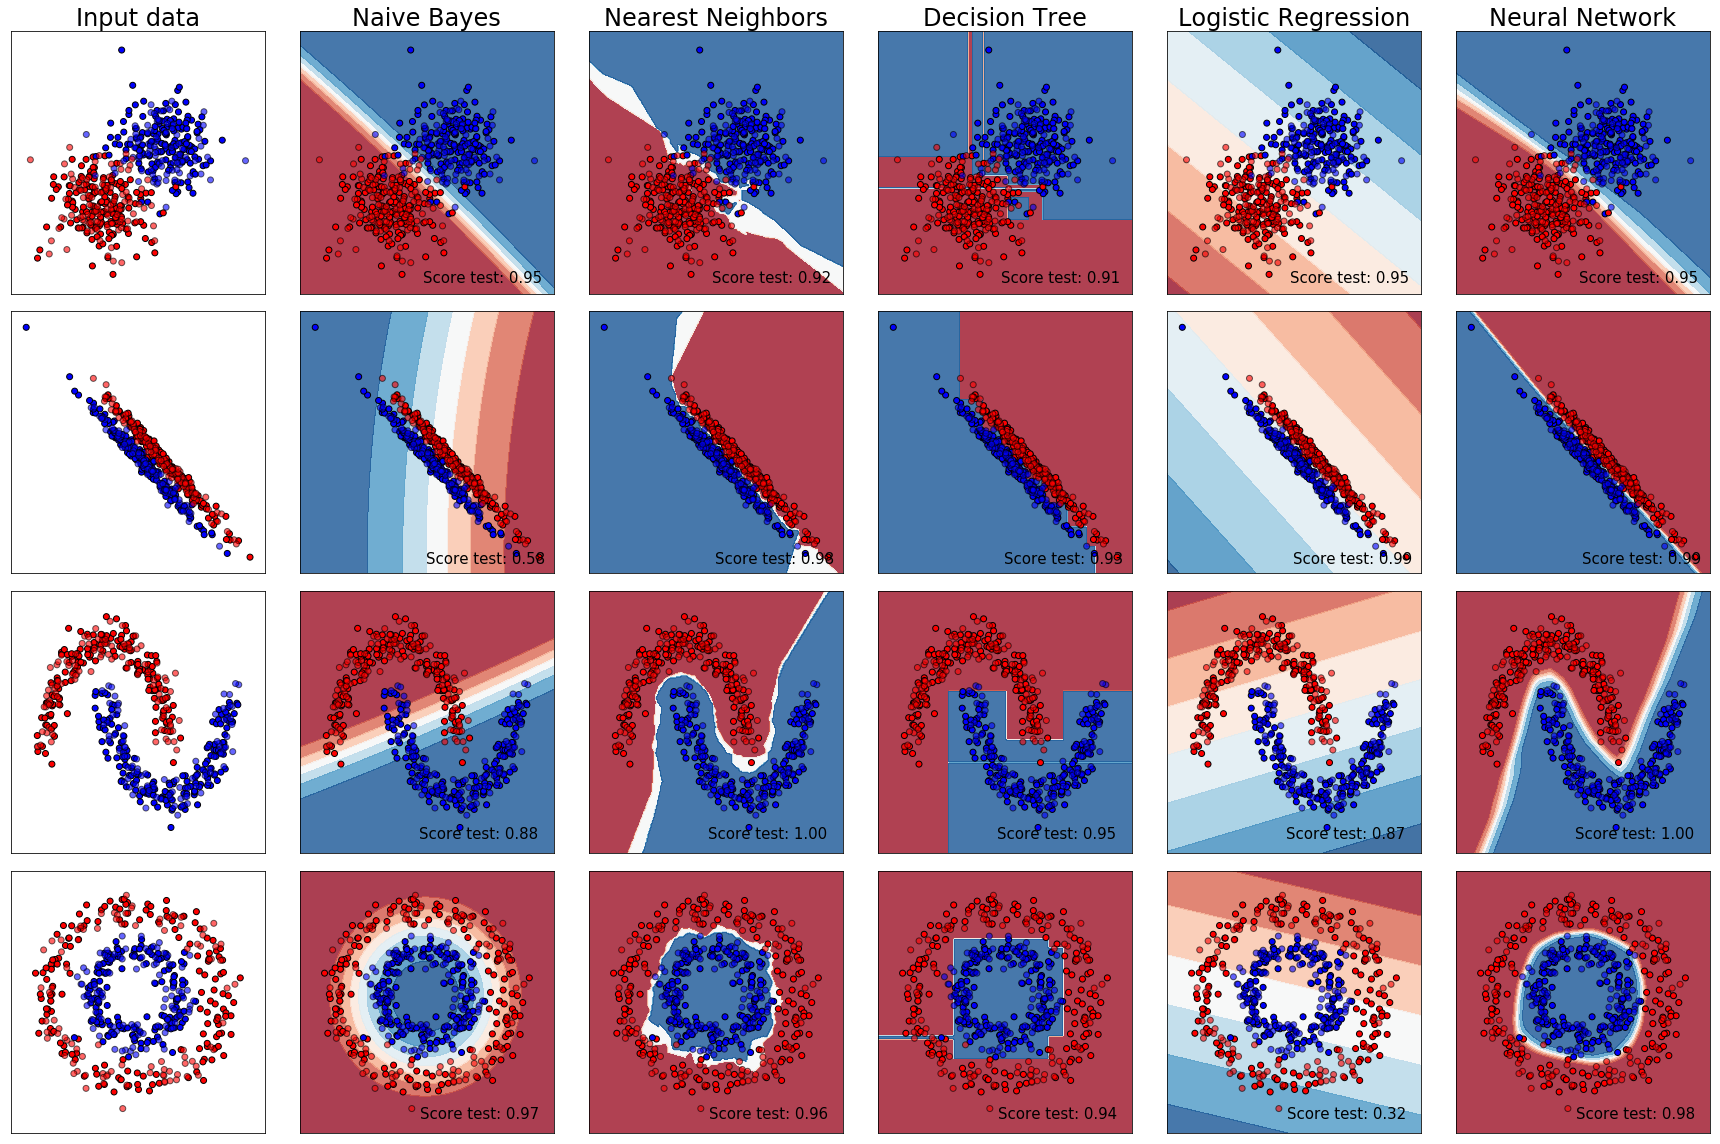

In [4]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=2)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=20)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,50,50),
                              max_iter=1000,
                              alpha=0))]

from p5_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

In [5]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB(priors=None)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='cons

**Prueba a cambiar los siguientes parámetros y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. ¿Por qué siempre debe ser impar cuando hay dos clases?
    
    Se usan un numero impar de vecino cuando hay dos clases para deshacer empates
    

* Profundidad máxima de los árboles de decisión.

    Observamos que al aumentar la profundiad el ajuste es mejor.
    Observamos tambien que entre 20 y 10 no hay mucha mejora. Cuando llegamos a una profundidad       "buena"aumentar mas la profundidad no hace que aumente mucho mas la precision
    
    
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. ** Nota: ** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

    Observamos que aumentar las neuronas de la primera capa, tomando como base 50, dejando solo una no hace que aumente mucho la precision
    Con dos capas vemos que aumenta mas la precisión, por ejemplo (50,50)
    Sin embargo añadiendo una tercera de 50 no observamos mucha mejora.
    
    Vemos que cuanto mas compleja sea la red, mas tiempo tardara el proceso de entrenamiento y pueden surgir problemas de overfiting. 
    Aunque, si la red es menos compleja menos capacidad tendrá de distinguir relaciones no lineales entre las entradas y las salidas.
    

# 2. Construcción de un clasificador en una base de datos real

In [6]:
df = pd.read_csv("pima.csv", header=0, sep=',')
print(df.shape)
df.head(5)

(768, 9)


,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


**El objetivo es predecir si una paciente tiene o no diabetes a partir de los valores de otras variables. La variable target es "class".**

* ** Pregnancies: ** Number of times pregnant
* ** Glucose: ** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* ** BloodPressure: ** Diastolic blood pressure (mm Hg)
* ** SkinThickness: ** Triceps skin fold thickness (mm)
* ** Insulin: ** 2-Hour serum insulin (mu U/ml)
* ** BMI: ** Body mass index (weight in kg/(height in m)^2)
* ** DiabetesPedigreeFunction: ** Diabetes pedigree function
* ** Age: ** Age (years)
* ** Class: ** Class variable ("yes" / "no")

In [7]:
nombres_atrs = list(df.columns)
nombres_atrs.remove('class')
print(nombres_atrs)
X = df[nombres_atrs].values
y = df['class'].values

['numPregnant', 'glucose', 'bloodPress', 'skinThick', 'insulin', 'massIndex', 'pedigree', 'age']


**Estadísticos básicos de cada atributo:**

In [8]:
df.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("yes"/"no"):**

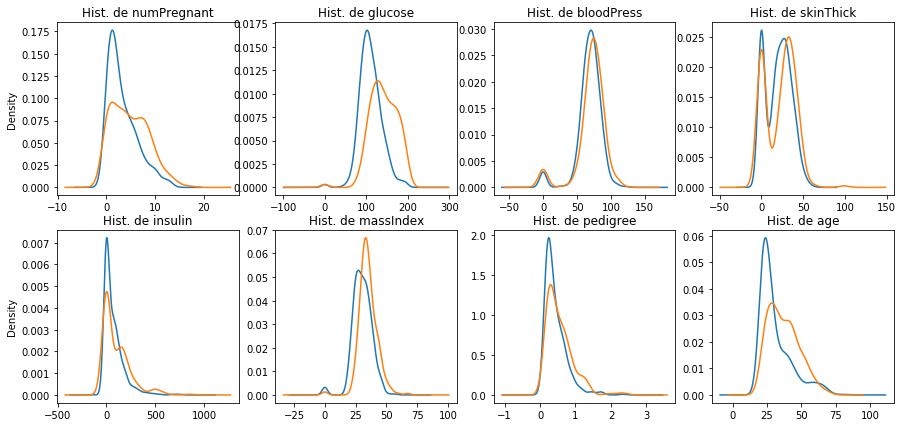

In [9]:
plt.figure(figsize=(15,7))
for i,n in enumerate(nombres_atrs):
    plt.subplot(2,4,i+1)
    aux = 'Density' if i%4==0 else ''
    df.groupby("class")[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux);

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [10]:
clf =  MLPClassifier(hidden_layer_sizes=(50,40,30,20,10),
                              max_iter=1000,
                              alpha=0)
scores = cross_val_score(clf, X, y, cv=5)
#print("scores: ", scores)
print("Score global del modelo: {:.2f} +/- {:.2f}".format(scores.mean(), scores.std()))

Score global del modelo: 0.61 +/- 0.13


In [22]:
#bucle para k neighbours
max = 0.0
k = 0
#aumentamos de dos en 2 porque tiene que ser impar
for i in range(1,102,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, X, y, cv=5)
    if max < scores.mean():
        max = scores.mean()
        k = i
        
print (max)
print (k)

0.755258467023
13


In [23]:
#bucle para el arbol de decision
max = 0.0
k = 0
for i in range(1,100):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, X, y, cv=5)
    #ponemos < y no <= porque solo nos interesa si el score es mayor
    # si es igual no, porque no mejoraria y conllevaria mas esfuerzo
    if max < float(scores.mean()):
        max = float(scores.mean())
        k = i
        
print (max)
print (k)

0.75007215007215
5


In [24]:
## CON 1 CAPA
max = 0.0
k = 0
for i in range(5,101,5):
    clf = MLPClassifier(hidden_layer_sizes=(i),
                              max_iter=1000,
                              alpha=0)
    scores = cross_val_score(clf, X, y, cv=5)
    if max < float(scores.mean()):
        max = float(scores.mean())
        k = i
        
print (max)
print (k)

0.6756981580510992
55


In [30]:
## CON 2 CAPAS
max = 0.0
k = 0
l = 0
for j in range(5,51,5):
    #
    if j <= i:
        
        for i in range(5,51,5):
            clf = MLPClassifier(hidden_layer_sizes=(i,j),
                                      max_iter=1000,
                                      alpha=0)
            scores = cross_val_score(clf, X, y, cv=5)
            if max < float(scores.mean()):
                max = float(scores.mean())
                k = i
                l = j
                
        
print (max)
print (k)
print (l)

0.6848909260673967
35
50


## Responde aquí a las siguientes preguntas:

* ¿Cuál es el mejor score que consigues con un k-nn y con qué k (valor de n_neighbours)?
* ¿Cuál es el mejor score que consigues con un árbol de decisión y con qué profundidad máxima (valor de max_depth)?
* ¿Cuál es el mejor score que consigues con una red neuronal y con qué configuración (valor de hidden_layer_sizes)?

Nota: para responder a estas preguntas sólo hay que cambiar el tipo de modelo y sus parámetros en la celda anterior.

**Después de haber respondido aquí a estas preguntas, deberás subir este notebook a la tarea de Moodle.**

#### pregunta1
Hemos hecho un bucle para coger el que tuviese el mejor score. Cogemos solo los numeros impares por lo explicado en la priemra pregunta del ejercicio anterior.
El mejor resultado lo obtenemos con n_neighbours = 13 y el score obtenido es 0,75

#### pregunta2
Hemos seguido un procedimiento analogo al anterior. El mejor score lo conseguimos con max_depth = 5, y es 0,75.

#### pregunta3

Para este apartado hemos impementado dos bucles ,uno que varia una capa y otro dos capas.
Esto lo hemos hecho asi porque no existe una razon teórica para usar más de dos capas ocultas. El entrenamiento se hace más lento cuantas más capas ocultas se usen y la capa adicional a través de la cual se propaga el error hace el gradiente más inestable y el número de mínimos locales usualmente se incrementa dramáticamente.
Además, el uso excesivo de neuronas puede ser causante de overfitting, así que hemos limitado el número a 50.

Teniendo en cuenta esto, el mejor resultado que obtenemos es hidden_layer = (50,35) y el score es 0,68